In [88]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
CityDF = pd.read_csv(city_data_to_load)
RideDF = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
# Retain right index 
CityRidesDF = pd.merge(RideDF,CityDF,on='city',how='left')

# Display the data table for preview
CityRidesDF.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [89]:
# Group Fare, rides and driver count by city
GroupedCityDF = CityRidesDF.groupby('city')

# Get Total Rides per city 
Rides_City_CountDF = GroupedCityDF['ride_id'].count()
Rides_City_CountDF = Rides_City_CountDF.reset_index()
Rides_City_CountDF = Rides_City_CountDF.rename(columns={'ride_id':'Total Rides Per City'})

# Get City Types, this will be a list
CityTypes = CityRidesDF['type'].unique()

# Get Average Fare per city - mean() will calculate average
AverageFareDF = GroupedCityDF['fare'].mean()
AverageFareDF = AverageFareDF.reset_index()
#AverageFareDF.head()

# Get Total Drivers per City
DriversCityDF = GroupedCityDF['driver_count'].min()
DriversCityDF = DriversCityDF.reset_index()

# Need to store city type in both Average Fare and Drivers city DF's
TypeDF = GroupedCityDF['type'].first().reset_index()
AverageFareDF['type'] = TypeDF['type']
DriversCityDF['type'] = TypeDF['type']
Rides_City_CountDF['type'] = TypeDF['type']

# X-Axis variables
RidesUrbanDF = Rides_City_CountDF.loc[(Rides_City_CountDF['type']=='Urban')]
RidesSuburbanDF = Rides_City_CountDF.loc[(Rides_City_CountDF['type']=='Suburban')]
RidesRuralDF = Rides_City_CountDF.loc[(Rides_City_CountDF['type']=='Rural')]

# Y-Axis variables
AverageFareUrbanDF = AverageFareDF.loc[(AverageFareDF['type']=='Urban')]
AverageFareSuburbanDF = AverageFareDF.loc[(AverageFareDF['type']=='Suburban')]
AverageFareRuralDF = AverageFareDF.loc[(AverageFareDF['type']=='Rural')]

# Bubble Plot variables
DriversCityUrbanDF = DriversCityDF.loc[(DriversCityDF['type']=='Urban')]
DriversCitySuburbanDF = DriversCityDF.loc[(DriversCityDF['type']=='Suburban')]
DriversCityRuralDF = DriversCityDF.loc[(DriversCityDF['type']=='Rural')]

## Bubble Plot of Ride Sharing Data

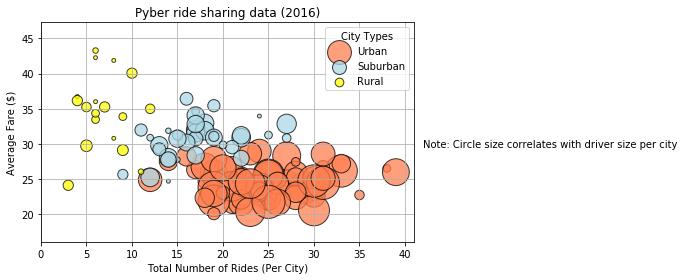

In [93]:
# Obtain the x and y coordinates for each of the three city types
# X Axis is Rides count that is last column in DataFrame
# x_axis = Rides_City_CountDF.iloc[:,-1]

# Y axis will plot Average Fare ($), this is also last column in DF
#AverageFare = AverageFareDF.iloc[:,-1]
xAxis1 = RidesUrbanDF['Total Rides Per City']
xAxis2 = RidesSuburbanDF['Total Rides Per City']
xAxis3 = RidesRuralDF['Total Rides Per City']

AverageFareUrban = AverageFareUrbanDF['fare']
AverageFareSuburban = AverageFareSuburbanDF['fare']
AverageFareRural = AverageFareRuralDF['fare']

DriversCityUrban = DriversCityUrbanDF['driver_count']
DriversCitySuburban = DriversCitySuburbanDF['driver_count']
DriversCityRural = DriversCityRuralDF['driver_count']

# Build the scatter plots for each city types
plt.scatter(xAxis1, AverageFareUrban, marker="o", facecolors="coral", s=DriversCityUrban*15, edgecolors="black", alpha=0.75, label = 'Urban')
plt.scatter(xAxis2, AverageFareSuburban, marker="o", facecolors="lightblue", s=DriversCitySuburban*15, edgecolors="black", alpha=0.75, label = 'Suburban')
plt.scatter(xAxis3, AverageFareRural, marker="o", facecolors="yellow", s=DriversCityRural*15, edgecolors="black", alpha=0.75, label = 'Rural')

# Incorporate the other graph properties
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.title('Pyber ride sharing data (2016)')
plt.xlim(0,max(Rides_City_CountDF['Total Rides Per City'])+2)
plt.ylim(min(AverageFareDF['fare'])-4,max(AverageFareDF['fare'])+4)

# Create a legend
plt.legend(title = 'City Types')
plt.text(56,30,'Note: Circle size correlates with driver size per city',horizontalalignment='center',verticalalignment='center')
# Incorporate a text label regarding circle size

# Save Figure
plt.grid()
plt.tight_layout()
plt.savefig("../Images/BubblePlot.png")
plt.show()

In [94]:
# Show plot
plt.show()

## Total Fares by City Type

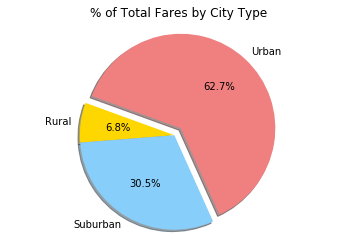

In [98]:
# Calculate Type Percents
# Get Total Fares by City type
GroupFaresDF = CityRidesDF.groupby('type')
TotalFaresDF = GroupFaresDF.sum()
TotalFaresDF = TotalFaresDF.reset_index()
CityType = TotalFaresDF['type']
TypeFares = TotalFaresDF['fare']

# Build Pie Chart
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0, 0, 0.1)
plt.title("% of Total Fares by City Type")
plt.pie(TypeFares, labels=CityType, explode=explode, colors=colors, autopct="%1.1f%%", shadow=True, startangle=160)
plt.axis("equal")

# Save Figure
plt.savefig("../Images/PercentFares.png")
plt.show()


In [14]:
# Show Figure
plt.show()

## Total Rides by City Type

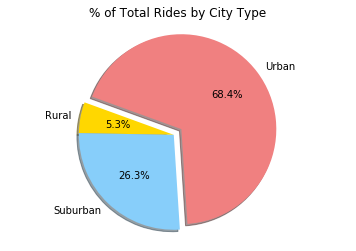

In [102]:
# Calculate Ride Percents
CountRidesDF = GroupFaresDF["ride_id"].count()
RidesCityType = []
for type in CityType:
    RidesCityType.append(CountRidesDF[type])

# Build Pie Chart
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0, 0, 0.1)
plt.title("% of Total Rides by City Type")
plt.pie(RidesCityType, labels=CityType, explode=explode, colors=colors, autopct="%1.1f%%", shadow=True, startangle=160)
plt.axis("equal")

# Save Figure
plt.savefig("../Images/RidesbyCityType.png")
plt.show()


In [103]:
# Show Figure
plt.show()

## Total Drivers by City Type

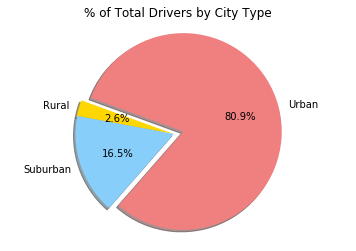

In [104]:
# Calculate Driver Percents
# This will be from city_data.csv file
DriverCityTypeGroupDF = CityDF.groupby('type').sum()
DriverCityTypeDF = DriverCityTypeGroupDF['driver_count']
DriversCityType = []
# For loop
for t in CityType:
    DriversCityType.append(DriverCityTypeDF[t])
DriverCityTypePercent

# Build Pie Chart
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0, 0, 0.1)
plt.title("% of Total Drivers by City Type")
plt.pie(DriversCityType, labels=CityType, explode=explode, colors=colors, autopct="%1.1f%%", shadow=True, startangle=160)
plt.axis("equal")

# Save Figure
plt.savefig("../Images/DriversbyCityType.png")
plt.show()

In [105]:
# Show Figure
plt.show()